In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from climakitae.core.data_interface import (
    get_data,
)

from renewable_data_load import *

# largescale change in cf

## PV

In [13]:
def cf_delta(resource, module, domain, variable, frequency, simulation, gwl1, gwl2):
    gwl_list = get_ren_cf_data_gwl(
        resource, module, domain, variable, frequency, simulation, [gwl1, gwl2]
    )
    delta = (
        gwl_list[1].mean(dim="time").squeeze() - gwl_list[0].mean(dim="time").squeeze()
    )
    delta = delta.compute()
    return delta


def drought_count_delta(
    resource, module, domain, variable, frequency, simulation, gwl1, gwl2
):
    gwl_list = [
        get_ren_drought_data(
            resource, module, domain, variable, frequency, simulation, gwl1
        ),
        get_ren_drought_data(
            resource, module, domain, variable, frequency, simulation, gwl2
        ),
    ]
    delta = (
        gwl_list[1].sum(["month", "year"]).squeeze()
        - gwl_list[0].sum(["month", "year"]).squeeze()
    )
    delta = delta.compute()
    return delta

In [11]:
resource = "pv"
module = "utility"
domain = "d02"
variable = "cf"
frequency = "day"
simulation = "all"
simulation = "miroc6"

delta_cf = cf_delta(resource, module, domain, variable, frequency, simulation, 0.8, 2.0)

miroc6 0.8C: 1997-2026
miroc6 2.0C: 2033-2062


KeyboardInterrupt: 

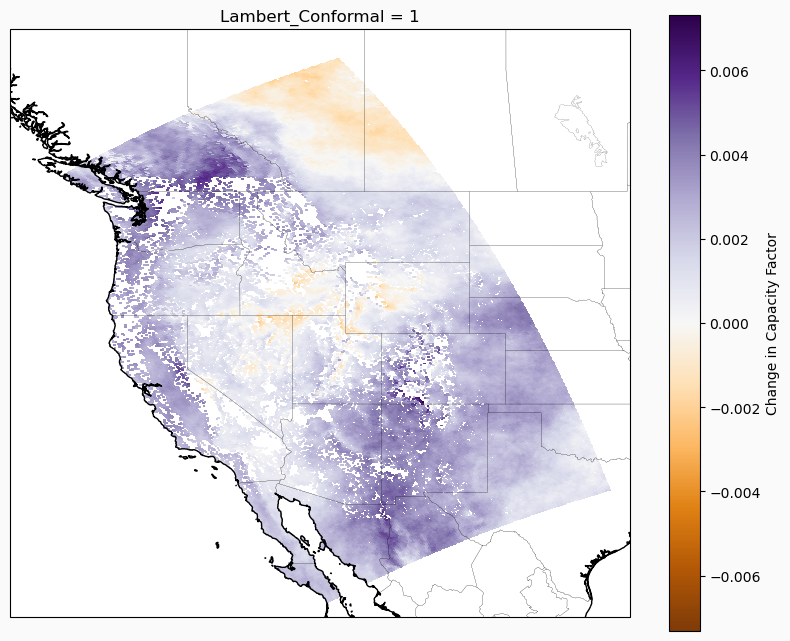

In [5]:
fig = plt.figure(figsize=(10, 8), facecolor="#FAFAFA")  # open matplotlib figure
ax = plt.axes(projection=ccrs.PlateCarree())
delta_cf.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "Change in Capacity Factor"},
    cmap="PuOr",
)

ax.set_extent([-130, -95, 25, 57])

ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
# adjust lat/lon bounds
# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

ec-earth3 0.8C: 1988-2017
ec-earth3 3.0C: 2037-2066
mpi-esm1-2-hr 0.8C: 1981-2010
mpi-esm1-2-hr 3.0C: 2058-2087
miroc6 0.8C: 1997-2026
miroc6 3.0C: 2056-2085
taiesm1 0.8C: 1996-2025
taiesm1 3.0C: 2033-2062


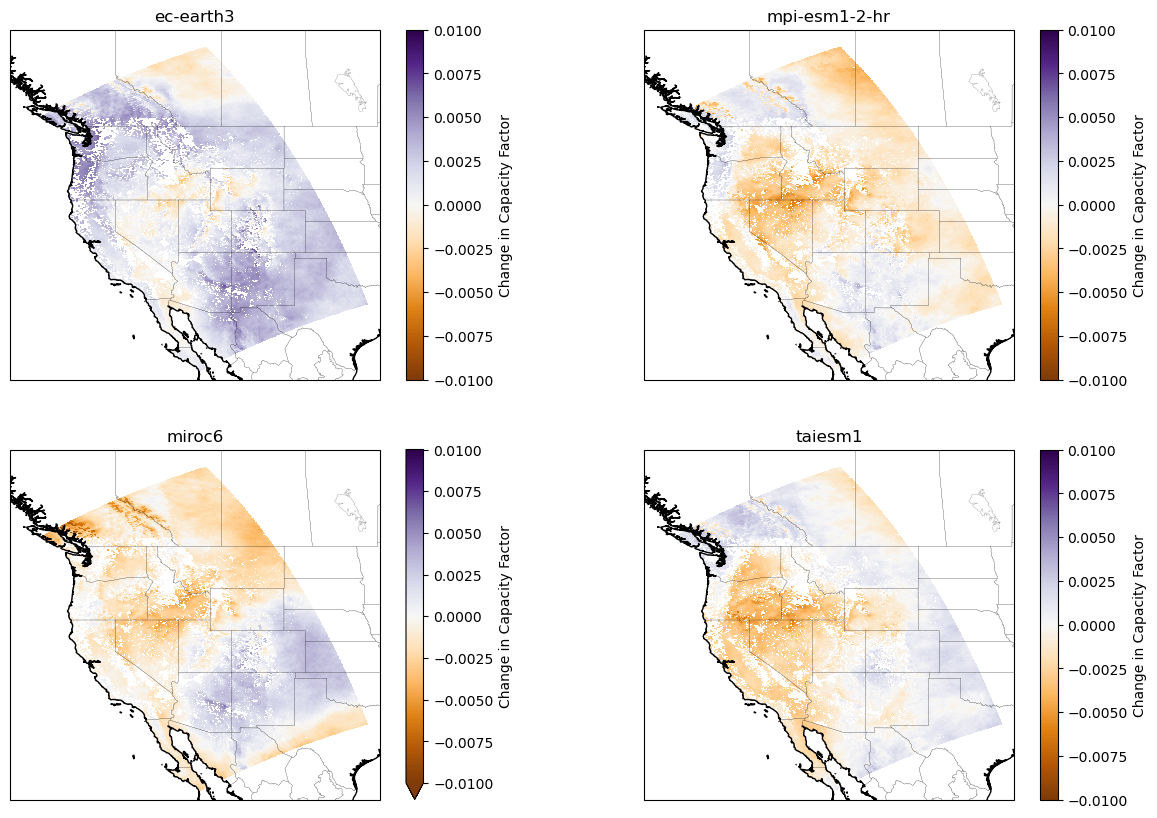

In [6]:
# calculate the delta for each simulation, and make a multipanel plot of the results
simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]
deltas = {}
for simulation in simulations:
    deltas[simulation] = cf_delta(
        resource, module, domain, variable, frequency, simulation, 0.8, 3.0
    )
fig, axes = plt.subplots(
    2, 2, figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Change in Capacity Factor"},
        cmap="PuOr",
        vmin=-0.01,
        vmax=0.01,
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")

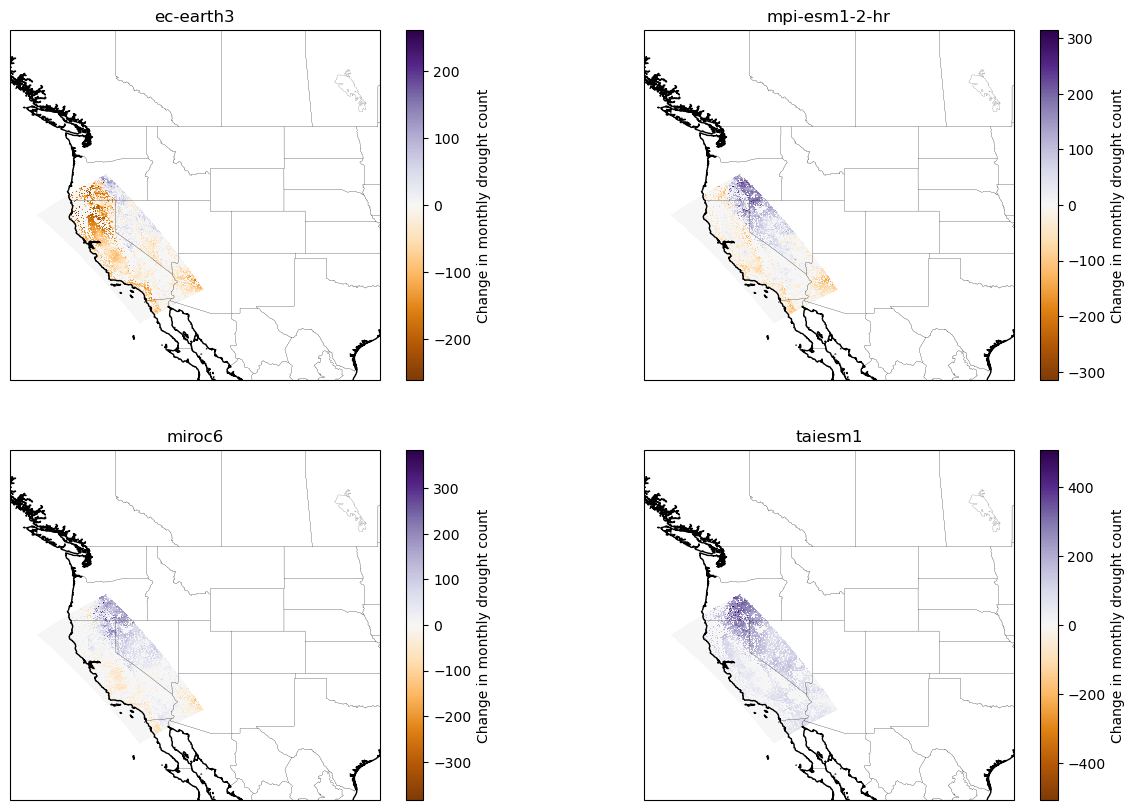

In [28]:
resource = "pv"
module = "utility"
domain = "d03"
variable = "cf"
frequency = "mon"
simulation = "all"
variable = "drought_count"

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]
deltas = {}
for simulation in simulations:
    deltas[simulation] = drought_count_delta(
        resource, module, domain, variable, frequency, simulation, "plus08c", "plus30c"
    )
fig, axes = plt.subplots(
    2, 2, figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Change in monthly drought count"},
        cmap="PuOr",
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")

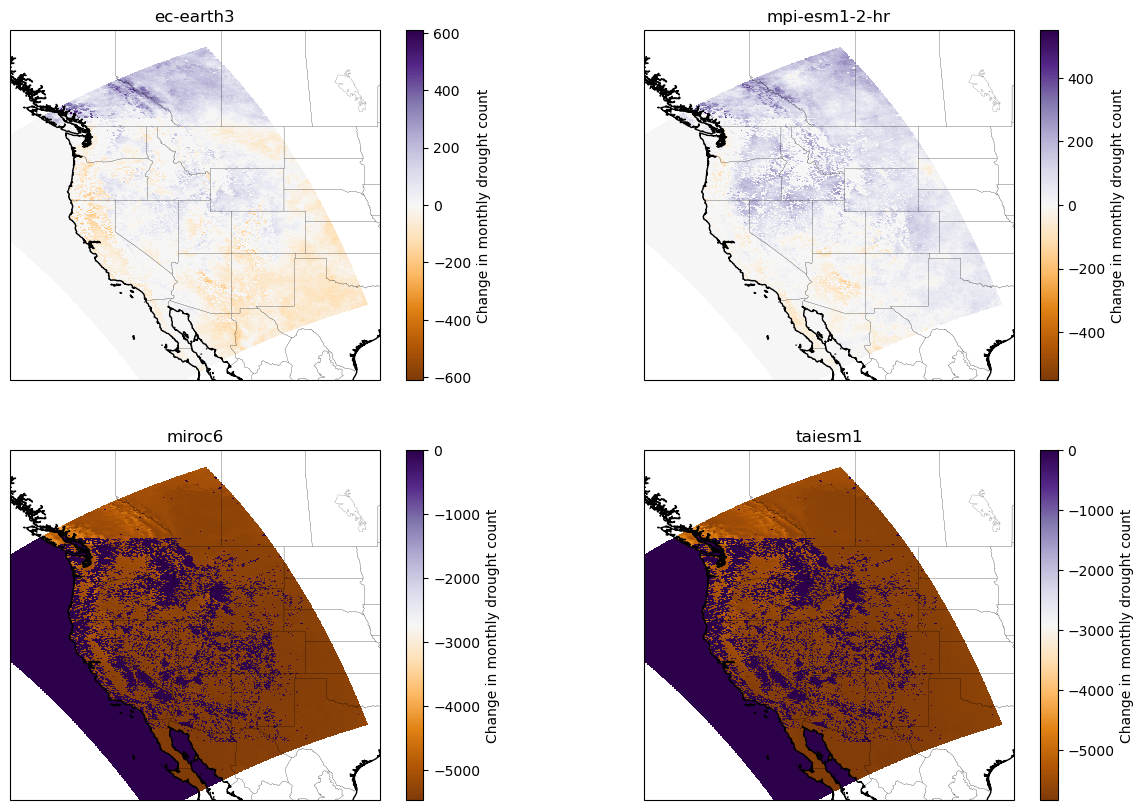

In [78]:
resource = "pv"
module = "utility"
domain = "d02"
variable = "cf"
frequency = "mon"
simulation = "all"
variable = "drought_count"

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]
deltas = {}
for simulation in simulations:
    deltas[simulation] = drought_count_delta(
        resource, module, domain, variable, frequency, simulation, "plus08c", "plus30c"
    )
fig, axes = plt.subplots(
    2, 2, figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Change in monthly drought count"},
        cmap="PuOr",
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")

In [77]:
deltas['ec-earth3']

<xarray.DataArray 'drought_count' (year: 30, y: 320, x: 250)> Size: 10MB
dask.array<getitem, shape=(30, 320, 250), dtype=float32, chunksize=(30, 290, 140), chunktype=numpy.ndarray>
Coordinates:
    Lambert_Conformal  int32 4B ...
    landmask           (y, x) float32 320kB dask.array<chunksize=(290, 140), meta=np.ndarray>
    lat                (y, x) float32 320kB dask.array<chunksize=(290, 140), meta=np.ndarray>
    lon                (y, x) float32 320kB dask.array<chunksize=(290, 140), meta=np.ndarray>
    month              int64 8B 1
  * x                  (x) float64 2kB -4.638e+06 -4.629e+06 ... -2.397e+06
  * y                  (y) float64 3kB -2.441e+05 -2.351e+05 ... 2.627e+06
  * year               (year) int64 240B 1988 1989 1990 1991 ... 2015 2016 2017
Attributes:
    data_type:             Gridded
    extended_description:  Count of resource drought days, defined as a day w...
    frequency:             month
    grid_mapping:          Lambert_Conformal
    long_name:             Count of resource drought days
    units:                 1

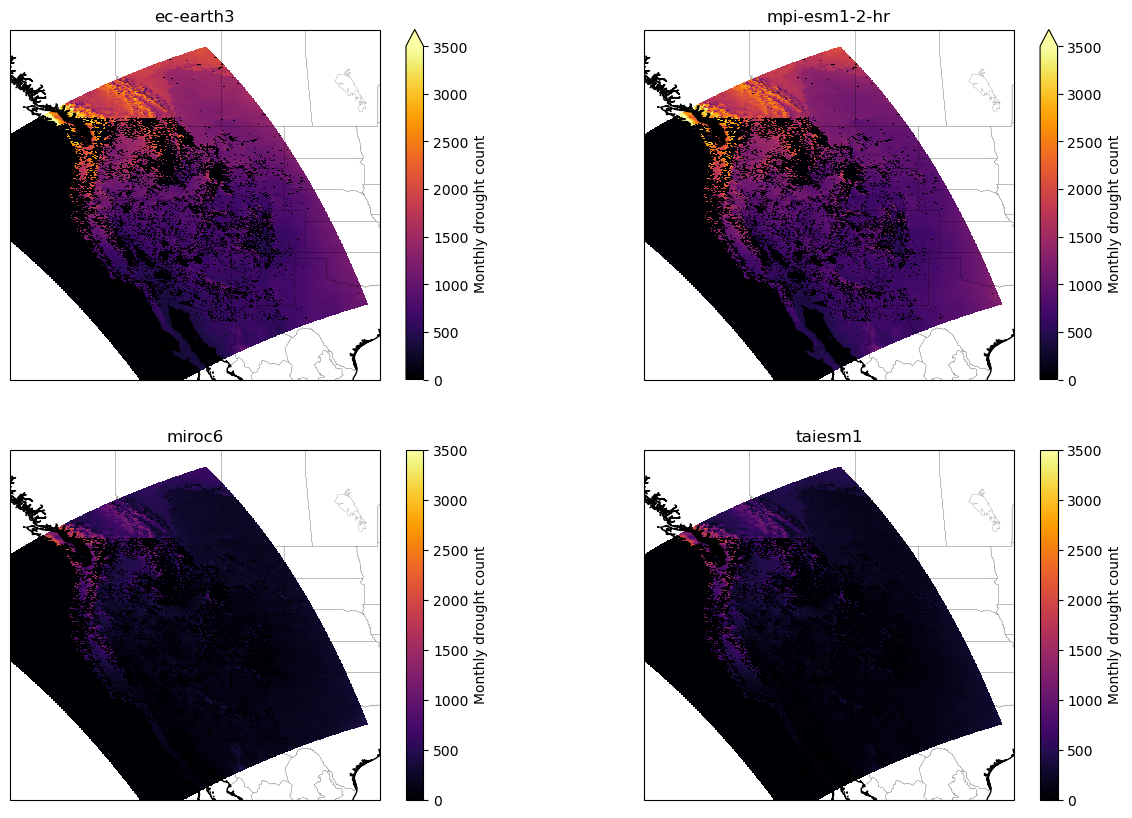

In [84]:
resource = "pv"
module = "utility"
domain = "d02"
variable = "cf"
frequency = "mon"
simulation = "all"
variable = "drought_count"

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]
deltas = {}
for simulation in simulations:
    deltas[simulation] = get_ren_drought_data(
        resource, module, domain, variable, frequency, simulation, "plus20c"
    ).sum(["month", "year"]).squeeze().compute()
fig, axes = plt.subplots(
    2, 2, figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Monthly drought count"},
        cmap="inferno",
        vmin=0,
        vmax=3500,
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")

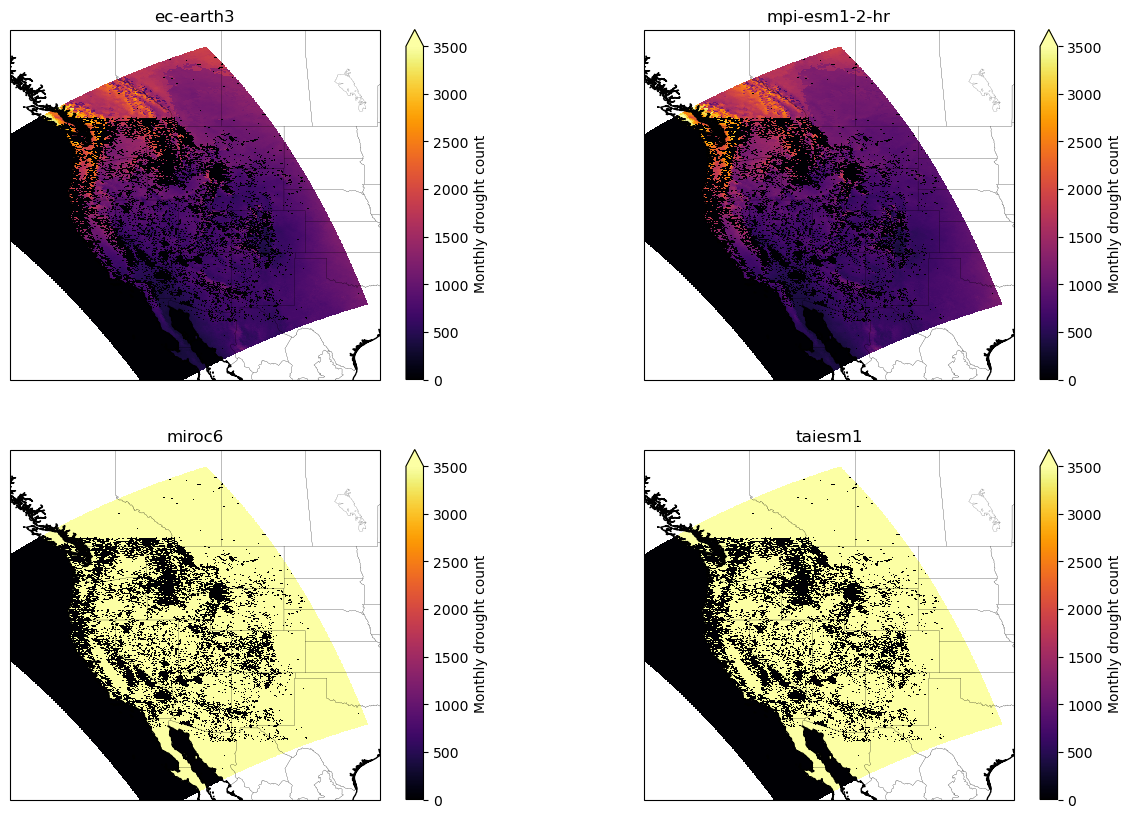

In [85]:
resource = "pv"
module = "utility"
domain = "d02"
variable = "cf"
frequency = "mon"
simulation = "all"
variable = "drought_count"

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]
deltas = {}
for simulation in simulations:
    deltas[simulation] = get_ren_drought_data(
        resource, module, domain, variable, frequency, simulation, "plus08c"
    ).sum(["month", "year"]).squeeze().compute()
fig, axes = plt.subplots(
    2, 2, figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Monthly drought count"},
        cmap="inferno",
        vmin=0,
        vmax=3500,
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")

In [110]:
resource = "pv"
module = "utility"
domain = "d02"
variable = "cf"
frequency = "mon"
simulation = "all"
variable = "drought_count"

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]

simulation = 'miroc6'
gwl1 = 'plus08c'
ds_gen = get_ren_drought_data(
            resource, module, domain, variable, frequency, simulation, gwl1
        ),

frequency = "day"
variable = "cf"
ds_cf = get_ren_cf_data(resource, module, domain, variable, frequency, simulation, 'historical')


Text(0.5, 1.0, 'Monthly Drought Count - MIROC6 - plus08c')

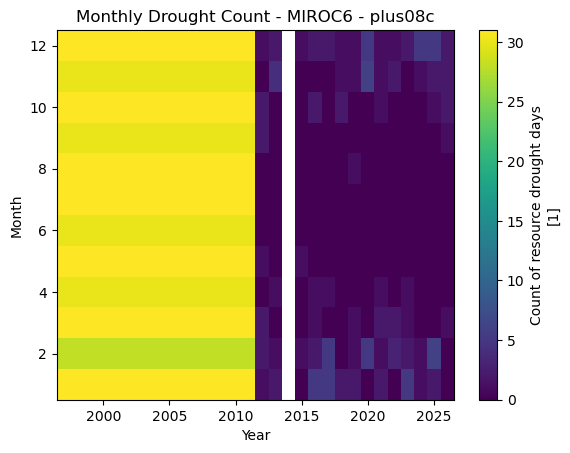

In [111]:
ds_gen[0].isel(x=150,y=150).plot()
plt.ylabel("Month")
plt.xlabel("Year")
plt.title("Monthly Drought Count - MIROC6 - plus08c")

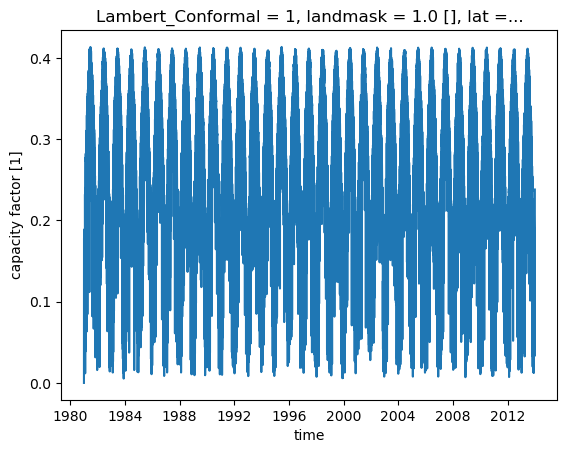

In [71]:
ds_cf.isel(x=150,y=150).plot()

In [101]:
resource = "pv"
module = "utility"
domain = "d02"
variable = "cf"
frequency = "day"
simulation = "all"
variable = "drought_mask"

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]

simulation = 'miroc6'
gwl1 = 'plus08c'
ds_gen = get_ren_drought_data(
            resource, module, domain, variable, frequency, simulation, gwl1
        ),



Text(0.5, 1.0, 'Monthly Drought Count - MIROC6 - plus08c')

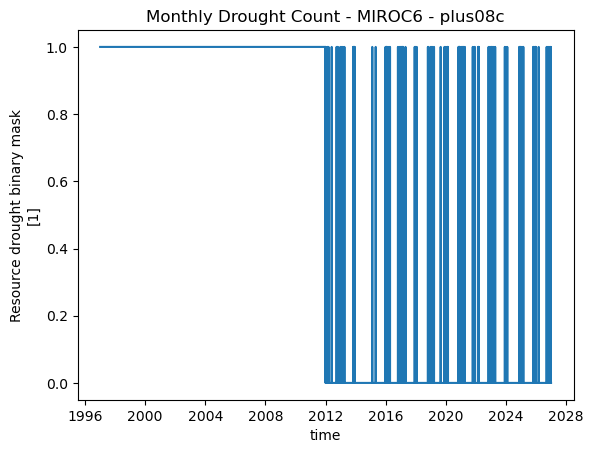

In [103]:
ds_gen[0].isel(x=150,y=150).plot()
plt.title("Monthly Drought Count - MIROC6 - plus08c")

In [112]:
resource = "windpower"
module = "onshore"
domain = "d02"
variable = "cf"
frequency = "mon"
simulation = "all"
variable = "drought_count"

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]

simulation = 'miroc6'
gwl1 = 'plus08c'
ds_gen = get_ren_drought_data(
            resource, module, domain, variable, frequency, simulation, gwl1
        ),

frequency = "day"
variable = "cf"
ds_cf = get_ren_cf_data(resource, module, domain, variable, frequency, simulation, 'historical')


Text(0.5, 1.0, 'Monthly Drought Count - wind - MIROC6 - plus08c')

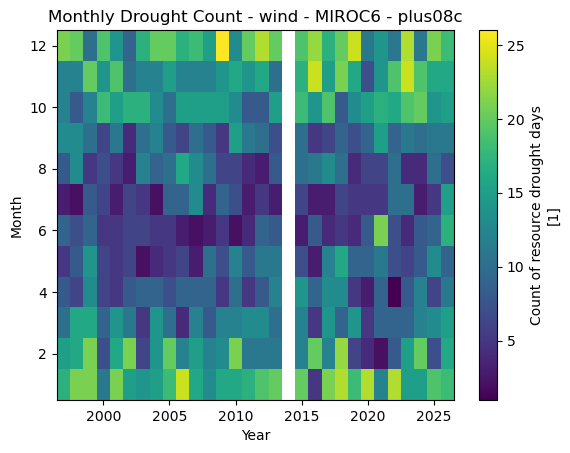

In [114]:
ds_gen[0].isel(x=150,y=150).plot()
plt.ylabel("Month")
plt.xlabel("Year")
plt.title("Monthly Drought Count - wind - MIROC6 - plus08c")

In [86]:
resource = "pv"
module = "utility"
domain = "d02"
variable = "cf"
frequency = "mon"
simulation = "all"
variable = "drought_count"

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]

simulation = "taiesm1"
gwl1 = 'plus08c'
ds_gen = get_ren_drought_data(
            resource, module, domain, variable, frequency, simulation, gwl1
        ),


Text(0.5, 1.0, 'Monthly Drought Count - TaiESM - plus08c')

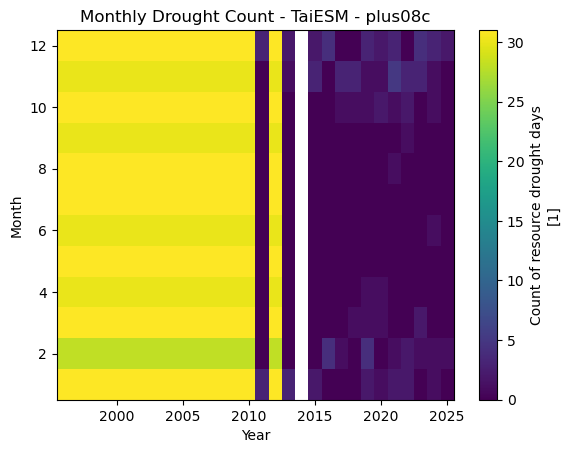

In [88]:
ds_gen[0].isel(x=150,y=150).plot()
plt.ylabel("Month")
plt.xlabel("Year")
plt.title("Monthly Drought Count - TaiESM - plus08c")

In [90]:
resource = "pv"
module = "utility"
domain = "d02"
variable = "cf"
frequency = "mon"
simulation = "all"
variable = "drought_count"

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]

simulation = "ec-earth3"
gwl1 = 'plus08c'
ds_gen = get_ren_drought_data(
            resource, module, domain, variable, frequency, simulation, gwl1
        ),


Text(0.5, 1.0, 'Monthly Drought Count - ec-earth3 - plus08c')

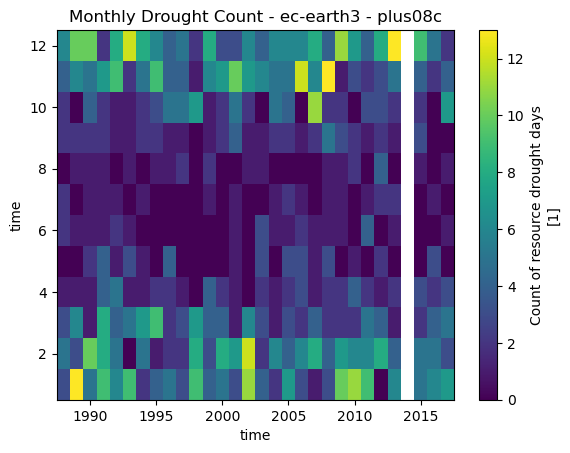

In [91]:
ds_gen[0].isel(x=150,y=150).plot()
plt.title("Monthly Drought Count - ec-earth3 - plus08c")